In [147]:
#IMPORTS

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et

In [148]:
#FORMAT PLOT
sns.set(font_scale=1.5)
sns.set_style("white")

In [149]:
#SET DIRECTORY AND GET DATA

#making space for directory
data = et.data.get_data('spatial-vector-lidar')
os.chdir(
    os.path.join(
        et.io.HOME, 
        'earth-analytics'
    )
)

#defining the path for all systems
world_bound_path = os.path.join(
    "data",
    "spatial-vector-lidar",
    "global",
    "ne_110m_land",
    "ne_110m_land.shp",
)

#importing the shapefile
world_bound = gpd.read_file(world_bound_path)

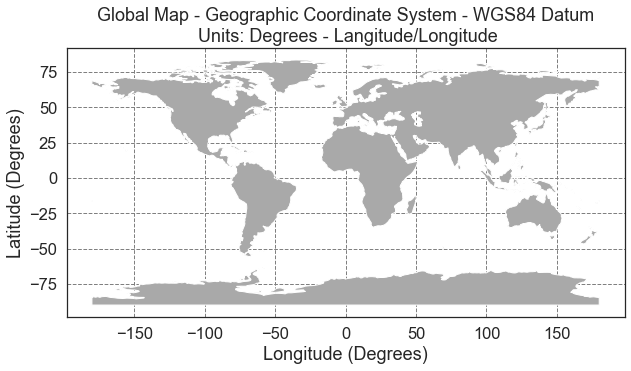

In [150]:
#PLOTTING THE DATA

#setting up figure and axis
fig, ax = plt.subplots(figsize=(10,5))

#setting up the plot
world_bound.plot(
    color = 'darkgrey', 
    ax = ax
)

#setting up the axes
ax.set(
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)",
    title = "Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Langitude/Longitude"
)

#add the x and y graticules(markers along the lines)
ax.set_axisbelow(True)
ax.yaxis.grid(
    color = 'gray',
    linestyle = 'dashed'
)
ax.xaxis.grid(
    color = 'gray',
    linestyle = 'dashed'
)

In [151]:
#CREATING SPATIAL POINT OBJECTS

#create a numpy array of x,y points
add_points = np.array(
    [
        [-105.2519, 40.0274], 
        [10.75, 59.95 ], 
        [2.9833, 39.6167],   
    ]
)

#convert points into shapely list of points
city_locations = [
    #this is a constructor that takes in a tuple as parameter
    Point(xy)
    for xy in add_points
]


In [152]:
#CREATING DATAFRAME WITH THE POINTS
city_locations = gpd.GeoDataFrame(
    city_locations,
    columns = ['geometry'],
    crs = world_bound.crs
)




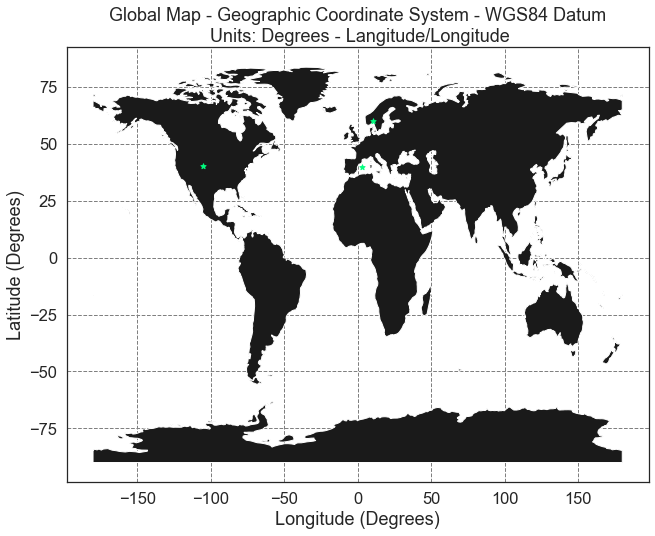

In [153]:
#PLOTTING LOCATIONS

#setting up figure and axes
fig, ax = plt.subplots(figsize = (12,8))

#formatting plot
world_bound.plot(
    figsize = (10, 5),
    color = 'k',
    ax = ax
)
city_locations.plot(
    color = 'springgreen',
    marker = '*',
    markersize = 30,
    ax = ax
)

#label axes and add graticules
ax.set(
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)",
    title = "Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Langitude/Longitude",
)
ax.set_axisbelow(True)
ax.yaxis.grid(color = 'gray', linestyle = 'dashed')
ax.xaxis.grid(color = 'gray', linestyle = 'dashed')



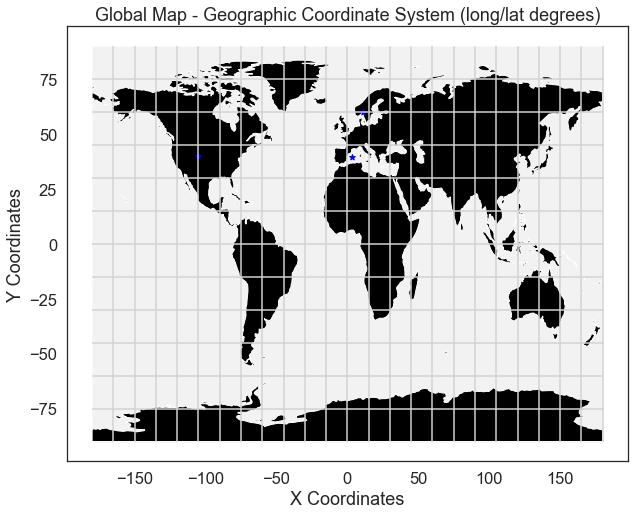

In [154]:
#IMPORTING PROPER GRATICULES

#setting path
graticule_path = os.path.join(
    "data",
    "spatial-vector-lidar",
    "global",
    "ne_110m_graticules_all",
    "ne_110m_graticules_15.shp"
)
bbox_path = os.path.join(
    "data",
    "spatial-vector-lidar",
    "global",
    "ne_110m_graticules_all",
    "ne_110m_wgs84_bounding_box.shp"
)

bbox = gpd.read_file(bbox_path)
graticule = gpd.read_file(graticule_path)

fig,ax = plt.subplots(figsize=(15,8))

#adding bounding box and graticule layers. alpha is opacity.
bbox.plot(
    ax = ax,
    alpha = .1,
    color = 'grey'
)
graticule.plot(
    ax = ax,
    color = 'lightgrey'
)
world_bound.plot(
    ax = ax,
    color = 'black'
)
city_locations.plot(
    ax = ax,
    color = 'blue',
    marker = '*'
)

#Add title and axes labels
ax.set(
    title = "Global Map - Geographic Coordinate System (long/lat degrees)",
    xlabel = "X Coordinates",
    ylabel = "Y Coordinates"
);

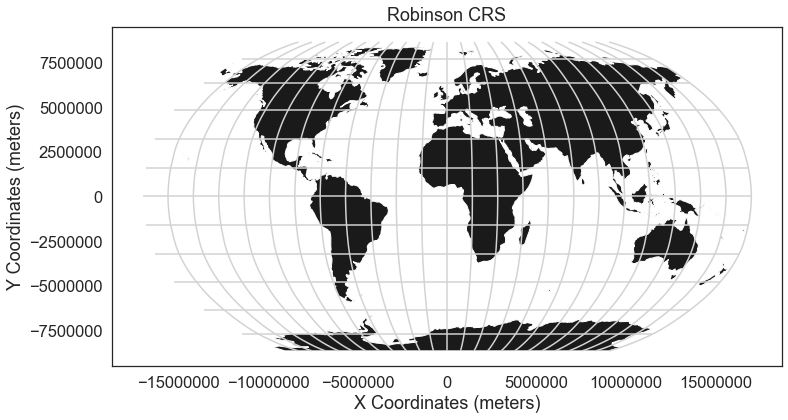

In [155]:
#ROBINSON PROJECTION

robin = world_bound.to_crs('+proj=robin')
grat_robin = graticule.to_crs('+proj=robin')

fig, ax = plt.subplots(figsize=(12,8))

robin.plot(
    ax = ax,
    color = 'k'
)
grat_robin.plot(
    ax = ax,
    color = 'lightgrey'
)

ax.set(
    title = "Robinson CRS",
    xlabel = "X Coordinates (meters)",
    ylabel = "Y Coordinates (meters)"
)

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

AttributeError: 'tuple' object has no attribute 'set_scientific'

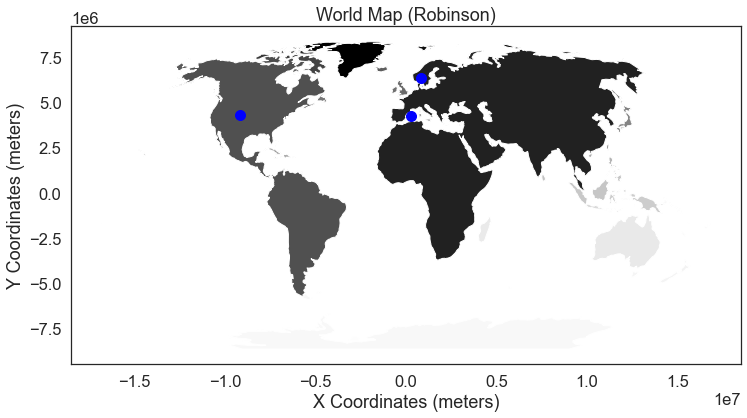

In [156]:
#REPROJECTIONS

#reproject points
robin_cities = city_locations.to_crs(robin.crs)

fig,ax = plt.subplots(figsize=(12,8))

robin.plot(
    ax = ax,
    cmap = 'Greys'
)
robin_cities.plot(
    ax = ax,
    markersize = 100,
    color = 'blue'
)

ax.set(
    title = "World Map (Robinson)",
    xlabel= "X Coordinates (meters)",
    ylabel = "Y Coordinates (meters)"
)


for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter(),
    formatter.set_scientific(False),
    axis.set_major_formatter(formatter)

plt.axis('equal')
